<a href="https://colab.research.google.com/github/yashrakeshmishra/Coursera_Capstone/blob/master/capstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project IBM Data Science Course

This Notebook is for the final Capstone Project in the IBM Data Science Professional Certificate course. It will involve a series of operations as required by the project.

# Predicting the severity of accident based on different conditions.

The model is trained using a classification algorithm. A data set consisting of road accidents in the city of Seattle from 2014 to present is used to train the model and evaluate it's metrics. Since the dataset only contains about two types of severities; namely slight and severe. A classic binary classfication algorithm is used to construct a model.

## 1. Introduction

  It was summers and we decided to take a road trip to a nearby ski resort. We had our check in at 11:00 AM. Since we were students, it was an expensive resort for us and we wanted to make the most of our. We didn't check the weather forecast, and we assumed that our navigation would get us to the place in 4 hours. However, the weather was severe and we had to drive with our usual speed to reach on time. That is when our car lost the grip on the road and was flung across the shoulder into a tree. Luckily we survived the crash, however, the car was totalled. If there was a way which could analyse the weather conditions and the area from where we had to drive and informed us about the possibility of a severe accident, we would've left way early an driven at a much slower speed than the regular one. This would've saved us from the unfortunate crash and a hefty repair cost.

### 1.1 Business Problem

  Unfortunate incidents often occur on the road. The unpredictability of these accidents make them so dangerous. It is usually the impatient nature of the human which leads to an accident. But wouldn't it be a blessing if the number of accidents that occur on a daily basis be reduced? That is the problem which will be addressed in this project. As we know, accidents can happen anytime and anywhere. However, there are many factors which might influence the severity of the accident. For instance, these include the weather conditions, time of the day, the speed of the car and the area the car is being driven. These factors greatly contribute whether the accident will be severe or not. Having the information about the above mentioned factors can be used to predict if the accident happens can be severe or not. The indication that there is a possibility of a severe accident if it happens might warn the car drivers to drive more carefully and hence prevent accidents.

  This would greatly reduce the loss of life and also damage to the property. This would also help routing softwares to give a warning which would alert the drivers and their insurance companies which would help them in saving cost.






## Importing the important libraries for handling data.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Downloading the data from the internet and storing it as a Pandas dataframe.

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [8]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Refining the data

Important colums which will we required to evaluate the severity are kept and other non essential elements are dropped.

In [9]:
data = df[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','INATTENTIONIND','UNDERINFL']]
attributes = data.columns.to_list()

The data obtained has many null values. We could have eliminated the null values but that would result in loss of dataset. Therefore, we replace the NaN values with the value with highest frequency in th column, since that value has the highest probability.

In [10]:
for column in attributes:
    data[column].fillna(data[column].mode()[0], inplace=True)

The columns <code> INATTENTIONIND </code> and <code> UNDERINFL </code>contained mixed values such as 'Y','N',1,0. Therefore we convert the data into numerical form.

In [11]:
data['INATTENTIONIND'].replace('Y',1,inplace=True)
data['INATTENTIONIND'].replace('N',0,inplace=True)
data.INATTENTIONIND.astype('int64')
data['UNDERINFL'].replace('Y',1,inplace=True)
data['UNDERINFL'].replace('N',0,inplace=True)
data.UNDERINFL.astype('int64');


Using the **One-Hot-Encoding** for the weather followed by dropping the weather column to obtain additonal columns with different types of weathers. The column value for a particular weather is 1 or 0 depending if the weather condition was true at the time of that particular accident.

In [12]:
weathers=pd.get_dummies(data.WEATHER)
data = pd.concat([data,weathers],axis=1)

In [13]:
data.drop(columns='WEATHER', inplace=True)

In [14]:
data.rename(columns={'Fog/Smog/Smoke': 'Smoke','Sleet/Hail/Freezing Rain':'Hail', 'Unknown': 'Unpredictable Weather', 'Blowing Sand/Dirt': 'Sandy'}, inplace=True)

In [ ]:
data.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,Sandy,Clear,Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Hail,Snowing,Unpredictable Weather
0,2,2,2,Wet,Daylight,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2,2,Wet,Dark - Street Lights On,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,4,3,Dry,Daylight,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,3,Dry,Daylight,1,0,0,1,0,0,0,0,0,0,0,0,0
4,2,2,2,Wet,Daylight,1,0,0,0,0,0,0,0,1,0,0,0,0


Performing the **One-Hot-Encoding** for <code>ROADCOND</code> and <code> LIGHTCOND</code> as well.

In [15]:
lighting = pd.get_dummies(data.LIGHTCOND)
data = pd.concat([data,lighting],axis=1)

In [16]:
data.drop('LIGHTCOND',axis=1,inplace=True)
data.rename(columns={'Unknown': 'Unknown Lighting'}, inplace=True)

In [17]:
roads = pd.get_dummies(data.ROADCOND, prefix='roadcond_')
data = pd.concat([data,roads],axis=1)

In [18]:
data.drop('ROADCOND',axis=1,inplace=True)
data.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,Sandy,Clear,Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Hail,Snowing,Unpredictable Weather,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown Lighting,roadcond__Dry,roadcond__Ice,roadcond__Oil,roadcond__Other,roadcond__Sand/Mud/Dirt,roadcond__Snow/Slush,roadcond__Standing Water,roadcond__Unknown,roadcond__Wet
0,2,2,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,3,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2,2,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


The data has been cleaned and is now ready to be processed. We know form our X and y sets for processing the data.
The 'y' set consists of the severity codes while the 'X' column consists of the features.

In [19]:
data.shape

(194673, 34)

## Exploratory Analysis

Understanding how severity of the accident and the number of people involved are related.

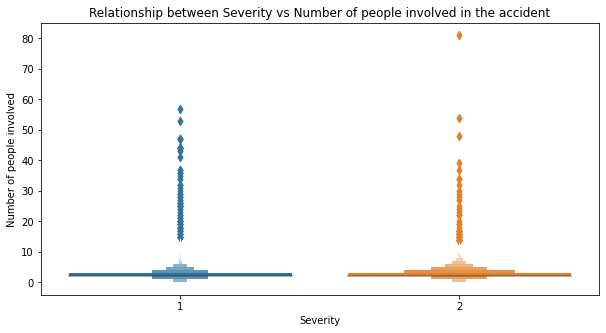

In [38]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='SEVERITYCODE',y='PERSONCOUNT',data=data)
plt.title("Relationship between Severity vs Number of people involved in the accident")
plt.xlabel("Severity")
plt.ylabel("Number of people involved")
plt.show()

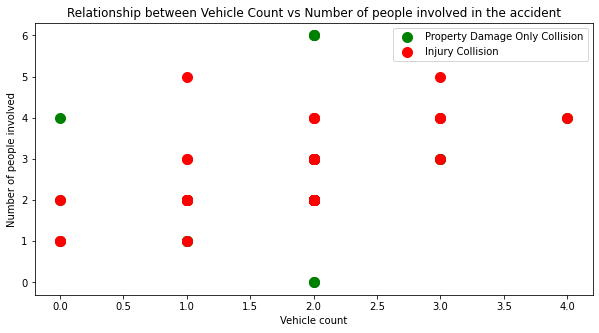

In [39]:

ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='Green', label='Property Damage Only Collision',s=100);
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='VEHCOUNT', y='PERSONCOUNT', color='Red', label='Injury Collision', ax=ax,figsize=(10,5), s=100);
plt.title("Relationship between Vehicle Count vs Number of people involved in the accident")
plt.xlabel("Vehicle count")
plt.ylabel("Number of people involved")
plt.show()

In [ ]:
y = np.asarray(data['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [ ]:
X = data.drop('SEVERITYCODE', axis=1)
X = np.asarray(X[X.columns.to_list()])
X = X.astype(int)

Normalizing the dataset:

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.33020207,  0.12553783,  0.        , -0.2217116 , -0.01696304,
        -1.21707436, -0.05414257, -0.06551471, -0.03476509,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.77768637, -0.17682024, -0.06551471, -0.03476509,
        -0.27267986, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874],
       [-0.33020207,  0.12553783,  0.        , -0.2217116 , -0.01696304,
        -1.21707436, -0.05414257, -0.06551471, -0.03476509, -0.4074222 ,
        -0.00506801,  2.2075721 , -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -0.08920831, -0.07872239,  1.73588509, -0.00751719,
        -0.1141037 , -1.2858654 , -0.17682024, -0.06551471, -0.03476509,
        -0.27267986, -1.4099744 , -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.

## Train/Test dataset

Now we create a Train/Test split to emulate out-of-sample testing to ensure the performance of our model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 35) (155738,)
Test set: (38935, 35) (38935,)


## Logistic Regression

Logistic regression would be performed to for the binary classification of the data. The best parameters for the Logistic regression would be evaluated using GridSearchCV and cross-validation would be performed.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score

Here, GridSearchCV performs cross validation on different parameters to find the optimal parameters for the model. These paramters are then used to train the model. Furthermore, testing the model on out-of-sample test data is done and the accuracy scores are measured.

In [ ]:
params_lr = { 'C':[0.001,0.01,0.1,0.5],
             'solver': ['newton-cg','lbfgs','liblinear']
             }
lr = LogisticRegression()
gridsearch_lr = GridSearchCV(lr, params_lr,cv=5,iid=True)
gridsearch_lr.fit(X_train,y_train)

lr_best_params = gridsearch_lr.best_params_
print("Best accuracy obtained",gridsearch_lr.best_score_)
print("Best parameters obtained",gridsearch_lr.best_params_)

lr_best_params

Best accuracy obtained 0.6997521478380356
Best parameters obtained {'C': 0.001, 'solver': 'liblinear'}


{'C': 0.001, 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(C=lr_best_params['C'], solver=lr_best_params['solver'])
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
lr_predictions_training = lr.predict_proba(X_train)
acc = (accuracy_score(y_test, lr_predictions))*100

In [ ]:
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,lr_predictions)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,lr_predictions,average='weighted',labels=np.unique(lr_predictions)))
print('\n')
print('Log-loss : ',log_loss(y_train,lr_predictions_training))
print('\n')
print('Test Accuracy: ',(accuracy_score(y_test, lr_predictions))*100,'%')

Jaccard Similarity Score :  70.58 %


F1-SCORE :  0.6084172730738718


Log-loss :  0.5774056689227738


Test Accuracy:  70.5791704122255 %


In [ ]:
table = pd.DataFrame({
    'Jaccard Similarity Score': [round(jaccard_similarity_score(y_test,lr_predictions)*100,2)],
    'F1 Score': [f1_score(y_test,lr_predictions,average='weighted',labels=np.unique(lr_predictions))],
    'Log loss': [log_loss(y_train,lr_predictions_training)],
    'Test Accuracy': [acc]})

In [ ]:
table.reset_index(drop=True,inplace=True)
table

,Jaccard Similarity Score,F1 Score,Log loss,Test Accuracy
0,70.58,0.608417,0.577406,70.57917


## Conclusion

>  A linear regression model was successfully created to predict the severity of the road accidents by evaluating various factors that occured in the training set data. The best parameters were found for the model and the model accuracy was measured. The model accuracy was found to be 70.5%.
 
 >Further additions to the project will involve improving the efficiency of the model by providing a more diverse dataset which would contain multiple degrees of collisions instead of just two collisions and using more algorithms with better parameters.